In [1]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt

dataset = []

f = gzip.open("renttherunway_final_data.json.gz")
for l in f:
    try:
        d = eval(l)
    except:
        continue
    dataset.append([d['user_id'], d['review_text'], d['fit']])
f.close()

df = pd.DataFrame(dataset, columns=['user_id', 'review_text', 'fit'])

In [2]:
df.describe()

,user_id,review_text,fit
count,192462,192462,192462
unique,105508,190951,3
top,691468,.,fit
freq,436,63,141995


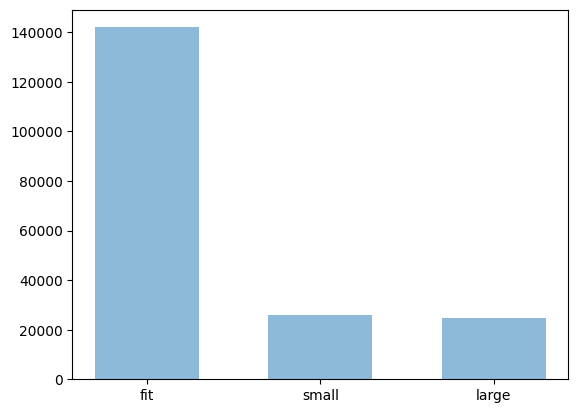

In [3]:
import string

cls_count = {'fit': 0, 'small': 0, 'large': 0}
fit_data = []
small_data = []
large_data = []
punctuation = set(string.punctuation)
for d in dataset:
    label = d[2]
    cls_count[label] += 1
    r = ''.join([c for c in d[1].lower() if not c in punctuation])
    if label == 'fit':
        fit_data.append(r)
    elif label == 'small':
        small_data.append(r)
    elif label == 'large':
        large_data.append(r)
    
plt.bar([0, 1, 2], list(cls_count.values()), width=0.6, tick_label=list(cls_count.keys()), align='center', alpha=0.5)
plt.savefig('bar.png')

In [13]:
import wordcloud

fit_wc = wordcloud.WordCloud(background_color="white")
fit_wc.generate(' '.join(fit_data))
fit_wc.to_file("fit.png")

large_wc = wordcloud.WordCloud(background_color="white")
large_wc.generate(' '.join(large_data))
large_wc.to_file("large.png")


small_wc = wordcloud.WordCloud(background_color="white")
small_wc.generate(' '.join(small_data))
small_wc.to_file("small.png")

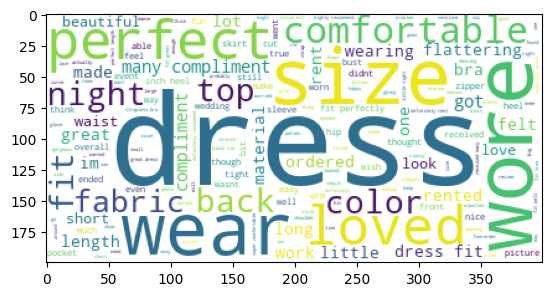

In [14]:
plt.imshow(fit_wc)

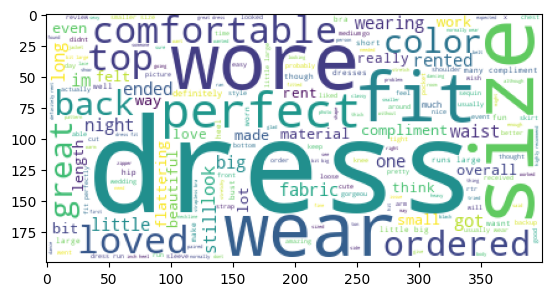

In [15]:
plt.imshow(large_wc)

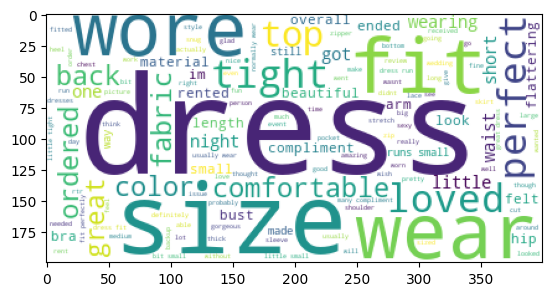

In [16]:
plt.imshow(small_wc)